In [1]:
import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 

In [2]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)
print(X1.shape)
print(y1.shape)

(50, 2)
(50,)


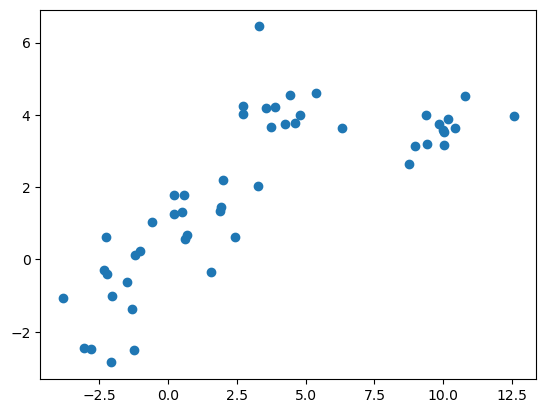

In [3]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

In [4]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [5]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

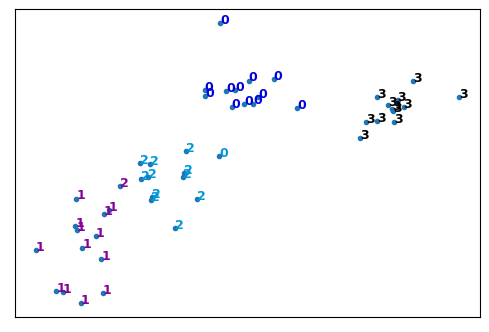

In [6]:
plt.figure(figsize=(6,4))
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
X1 = (X1 - x_min) / (x_max - x_min)
for i in range(X1.shape[0]):
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})   
plt.xticks([])
plt.yticks([])
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

In [7]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.7852715  0.46302836 ... 0.07214511 0.52419206 1.11523332]
 [0.7852715  0.         0.33701651 ... 0.77691414 0.26121701 0.43870684]
 [0.46302836 0.33701651 0.         ... 0.46875635 0.09611506 0.66061344]
 ...
 [0.07214511 0.77691414 0.46875635 ... 0.         0.51843991 1.12815343]
 [0.52419206 0.26121701 0.09611506 ... 0.51843991 0.         0.63285872]
 [1.11523332 0.43870684 0.66061344 ... 1.12815343 0.63285872 0.        ]]


In [8]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Student\AppData\Local\Temp\ipykernel_10088\3518085107.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


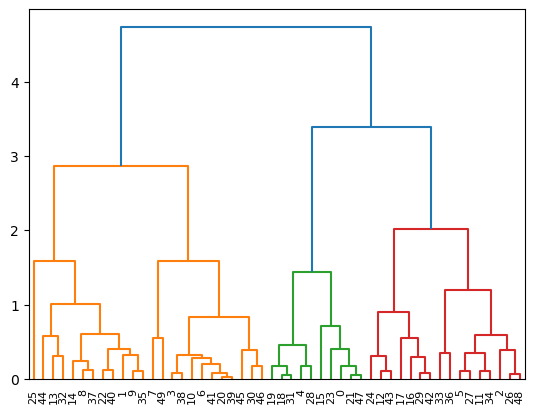

In [9]:
dendro = hierarchy.dendrogram(Z)